In [3]:
import utils

base = utils.load_results("results/base_results.pkl")
split = utils.load_results("results/app1_results.pkl")
epoch = utils.load_results("results/app2_results.pkl")


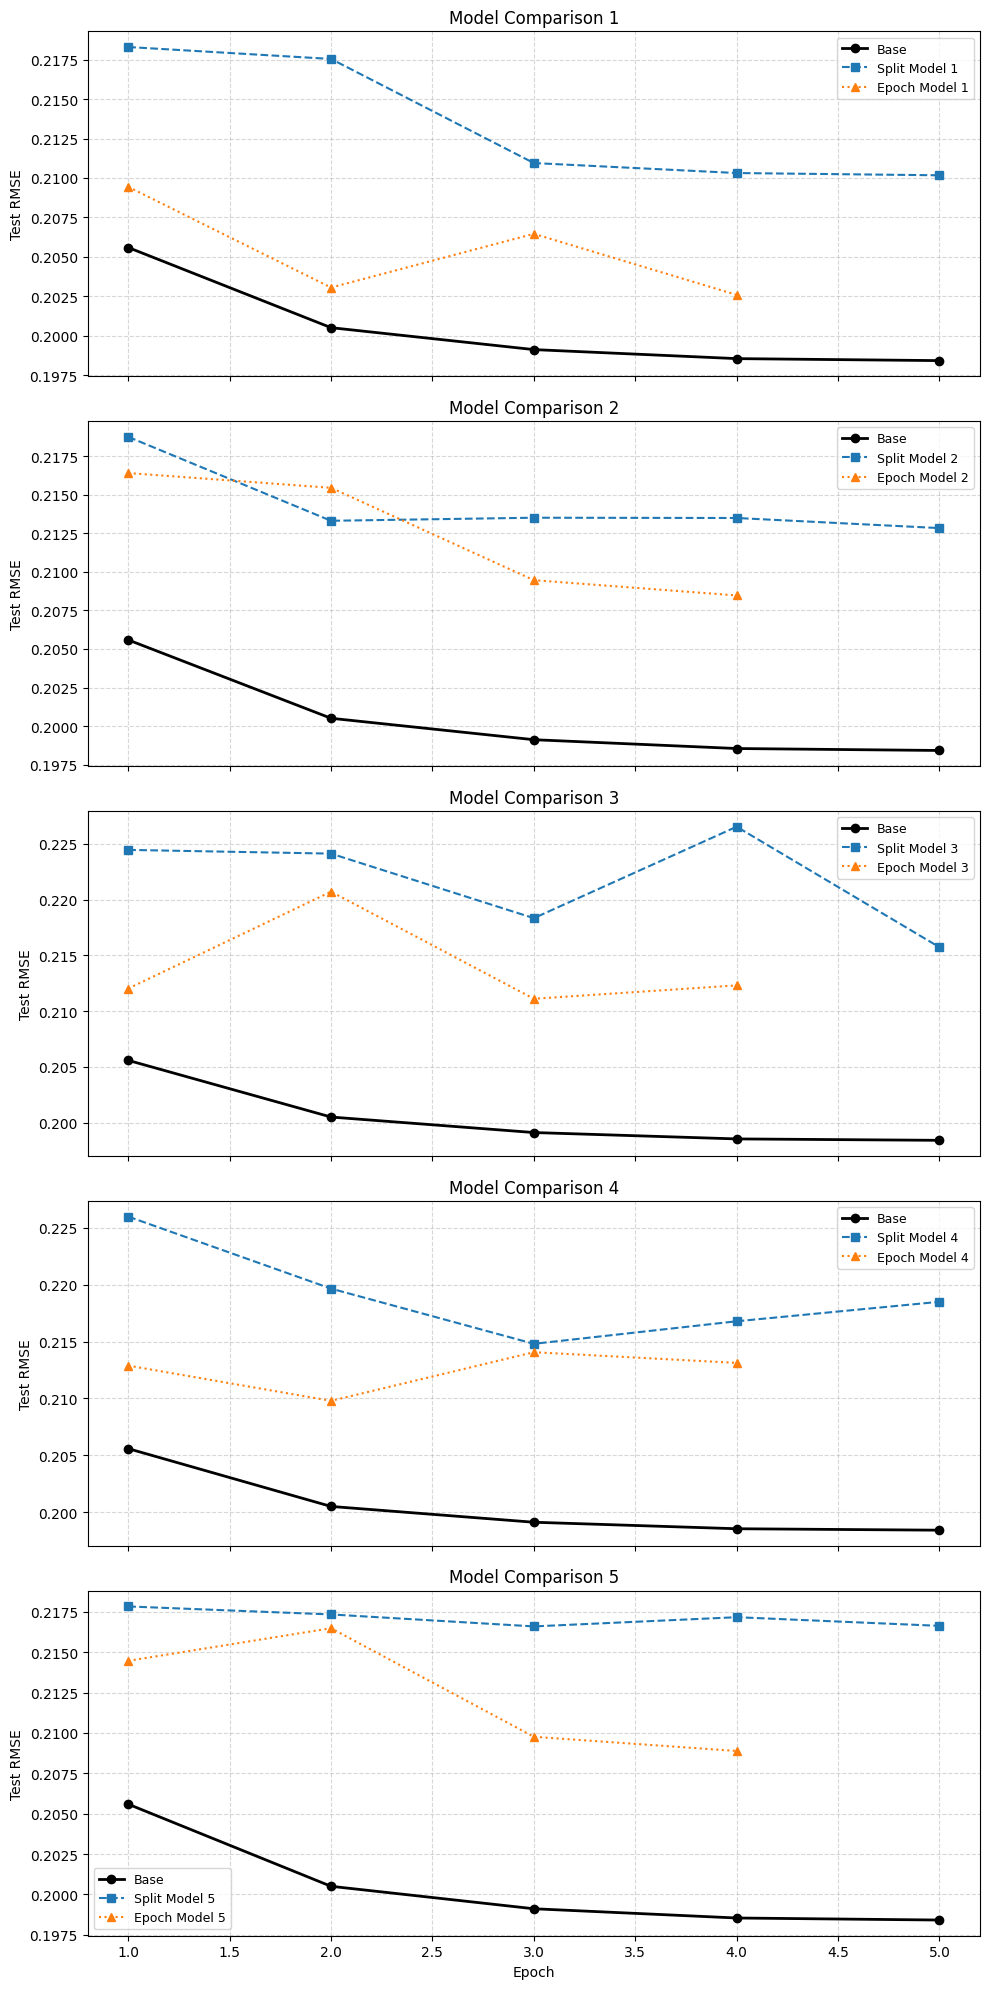

In [11]:
import matplotlib.pyplot as plt

# Base approach
base_test_rmse = base[0]["test_rmses"]
base_epochs = list(range(1, len(base_test_rmse) + 1))

# Number of models (assume both Split and Epoch approaches have same number of models)
n_models = len(split)

# Create subplots
fig, axes = plt.subplots(n_models, 1, figsize=(10, 4*n_models), sharex=True)

for i in range(n_models):
    ax = axes[i]

    # Base curve (common for all)
    ax.plot(base_epochs, base_test_rmse, label="Base", color='black', linewidth=2, marker='o')

    # Split approach model i
    split_model_rmse = split[i]["test_rmses"]
    ax.plot(range(1, len(split_model_rmse)+1), split_model_rmse, label=f"Split Model {i+1}", linestyle='--', marker='s')

    # Epoch approach model i
    epoch_model_rmse = epoch[i]["test_rmses"]
    ax.plot(range(1, len(epoch_model_rmse)+1), epoch_model_rmse, label=f"Epoch Model {i+1}", linestyle=':', marker='^')

    ax.set_ylabel("Test RMSE")
    ax.set_title(f"Model Comparison {i+1}")
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend(fontsize=9)

axes[-1].set_xlabel("Epoch")
plt.tight_layout()
plt.show()
